In [ ]:
import pandas as pd
import numpy as np

import keras
from keras import layers
from keras import models
from keras import optimizers

from keras.preprocessing.image import ImageDataGenerator, image
from keras.applications import mobilenet_v2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential, Model

import math
from sklearn.metrics import confusion_matrix, classification_report

import glob
import os
from pathlib import Path
import shutil

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
keras.__version__


'2.5.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = '/content/drive/MyDrive/threeclass/train'
validation_dir = '/content/drive/MyDrive/threeclass/validation'
test_dir = '/content/drive/MyDrive/threeclass/test'

## First Model Run with CNN

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=30,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 1799 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (30, 150, 150, 3)
labels batch shape: (30, 3)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=60,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=30)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
60/60 [==============================] - 862s 14s/step - loss: 1.1095 - acc: 0.4144 - val_loss: 1.0400 - val_acc: 0.4617
Epoch 2/30
60/60 [==============================] - 137s 2s/step - loss: 1.0290 - acc: 0.4602 - val_loss: 0.9857 - val_acc: 0.5317
Epoch 3/30
60/60 [==============================] - 136s 2s/step - loss: 0.9563 - acc: 0.5415 - val_loss: 0.9868 - val_acc: 0.5133
Epoch 4/30
60/60 [==============================] - 135s 2s/step - loss: 0.9706 - acc: 0.5268 - val_loss: 1.0433 - val_acc: 0.4900
Epoch 5/30
60/60 [==============================] - 135s 2s/step - loss: 0.9716 - acc: 0.5216 - val_loss: 0.9248 - val_acc: 0.5733
Epoch 6/30
60/60 [==============================] - 135s 2s/step - loss: 0.8858 - acc: 0.5641 - val_loss: 0.9191 - val_acc: 0.5567
Epoch 7/30
60/60 [==============================] - 135s 2s/step - loss: 0.9020 - acc: 0.5669 - val_loss: 0.8990 - val_acc: 0.5867
Epoch 8/30
60/60 [==============================] - 135s 2s/step - loss: 0.8706 - 

In [ ]:
model.save('multiclass_one.h5')

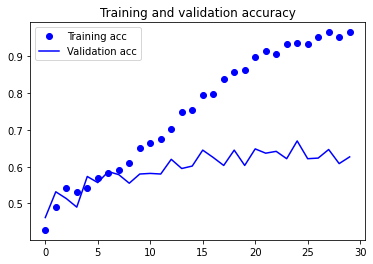

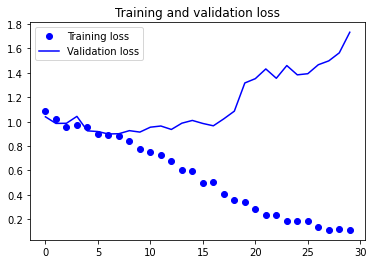

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
prediction = model.predict_classes(validation_generator)

print(confusion_matrix(validation_generator.labels, prediction))
print(classification_report(validation_generator.labels, prediction))